<a href="https://colab.research.google.com/github/sakibchowdhury131/Emotion_detection/blob/master/tomar_dewa_amar_kono_naam_chilo_na.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install num2words

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Changing base directory to  /content/drive/My Drive/Sentiment_analysis_NLP/All_codes


Using TensorFlow backend.


Checking requirements:
Extracting stanford data
Extracting glove data
Step1: Loading Embedding training Dataset...
Step2: Shuffling data...
Step3: Preprocessing the texts...
Step4: Building word2vec model...
Saving word2vec model in the disk


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Step5: Building sswe model...
1600000 1600000
Using Keras tokenizer to tokenize and build word index
Size of the vocab is 352268
Padding sentences and shuffling the sswe train data
Initializing the model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 50)            17613500  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 15)            3765      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 15)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
________________________________________________

/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/sswe.py:129: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(train_x, train_y,nb_epoch=no_epochs, batch_size=batch_size,validation_data=(valid_x, valid_y),callbacks=[mcp])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1280000 samples, validate on 320000 samples
Epoch 1/5
1280000/1280000 [==============================] - 10s 8us/step - loss: 0.5133 - acc: 0.7520 - val_loss: 0.4898 - val_acc: 0.7646
Epoch 2/5
1280000/1280000 [==============================] - 3s 3us/step - loss: 0.4778 - acc: 0.7732 - val_loss: 0.5030 - val_acc: 0.7642
Epoch 3/5
1280000/1280000 [==============================] - 3s 2us/step - loss: 0.4986 - acc: 0.7629 - val_loss: 0.5248 - val_acc: 0.7493
Epoch 4/5
1280000/1280000 [==============================] - 3s 3us/step - loss: 0.5115 - acc: 0.7550 - val_loss: 0.5493 - val_acc: 0.7244
Epoch 5/5
1280000/1280000 [==============================] - 3s 3us/step - loss: 0.5412 - acc: 0.7320 - val_loss: 0.5455 - val_acc: 0.7354
(352268, 2) (352270, 51)
(352268, 52)
Embedding Layers are trained.
Step6: loading sentiment treebank dataset...
Step7: Tokenizing...
Step8: Padding...
Step9: train and test set generation...
Step10: Generating word2vec embedding matrix...
Step11: des

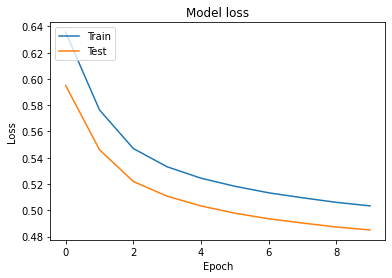

Saved model to disk
Loaded model from disk
47847/47847 [==============================] - 105s 2ms/step
accuracy:  76.86790823936462
negative precision:  0.6906211936662606
neutral precision:  0.6757332459446174
positive precision:  0.7318819188191882
negative recall:  0.4990521327014218
neutral recall:  0.5332643693023857
positive recall:  0.5631459398069278
negative f1_score:  0.5794128050937389
neutral f1_score:  0.5961045061973764
positive f1_score:  0.6365211810012836


In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May  9 22:34:44 2020

@author: sakib

"""


#change base directory
import os

base_path=r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
working_directory = '/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
data_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/data'
embedding_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/embeddings'
models_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/models'
model_directory = working_directory+'/'+'models'


def change_base_dir(base_dir_path):
    """ Change the working directopry of the code"""
    
    if not os.path.exists(base_dir_path):
        print ('creating directory', base_dir_path)
        os.makedirs(base_dir_path)
    print ('Changing base directory to ', base_dir_path)
    os.chdir(base_dir_path)
 
      

# base_folder='data'
# base_dir_path=base_path+'/'+base_folder
# change_base_dir(base_dir_path)
# download_data.extract_file('/media/sakib/alpha/work/EmotionDetectionDir/git/data/glove.6B.zip')



change_base_dir(base_path)
if not os.path.exists(data_folder):
        os.makedirs(data_folder)
if not os.path.exists(embedding_folder):
        os.makedirs(embedding_folder)
if not os.path.exists(models_folder):
        os.makedirs(models_folder)
  
#loading necessary files
from load_preprocess import load_data_embedding
from load_preprocess import preprocess_data
from load_preprocess import read_labels
import word2vec
import sswe
import glove_file
import designing_network
import download_data


#importing libraries
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd



# Download data

print('Checking requirements:')
download_data.download_data(base_path = base_path)

#loading data
print('Step1: Loading Embedding training Dataset...')


dataset_embedding = load_data_embedding(working_directory+'/data/'+'training.1600000.processed.noemoticon.csv')
print('Step2: Shuffling data...')
dataset_embedding = dataset_embedding.sample(frac=1) # reshuffling the data
print('Step3: Preprocessing the texts...')
texts = preprocess_data(dataset_embedding)
labels = read_labels(dataset_embedding)


# building word2vec model
print('Step4: Building word2vec model...')
EMBEDDING_DIM = 100
w2v = word2vec.create_word2vec(directory = working_directory+'/'+'embeddings',texts = texts ,min_count = 1,EMBEDDING_DIM = EMBEDDING_DIM)



#building sswe model
print('Step5: Building sswe model...')
sswe_model,training_word_index = sswe.sswe_model(texts, labels)
embedding_weights, word_indices_df, merged = sswe.save_sswe(sswe_model,training_word_index,directory = working_directory+'/'+'embeddings')
print('Embedding Layers are trained.')


#loading sentiment treebank dataset
print ('Step6: loading sentiment treebank dataset...')
dataset = pd.read_csv('stanford_sentiment_treebank_half_processed.csv')
texts = dataset['Text']
y = dataset.iloc[:,2:5].values


#tokenizing
print ('Step7: Tokenizing...')

tokens = []
for line in texts:
    words = word_tokenize(line)
    tokens.append(words)



tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokens)
sequences = tokenizer_obj.texts_to_sequences(tokens)


#padding
print ('Step8: Padding...')
tokenizer_word_index = tokenizer_obj.word_index
max_length = 150
review_pad = pad_sequences(sequences, maxlen = max_length)



# train test split
print('Step9: train and test set generation...')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review_pad, y, test_size = 0.20, random_state = 0)


# word2vec Embedding Matrix
print('Step10: Generating word2vec embedding matrix...')
num_words = len(tokenizer_word_index) + 1
embedding_matrix_w2v = word2vec.load_word2vec(working_directory+'/'+'embeddings'+'/'+'embeddings_w2v.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)


# training the word2vec model with lstm
print('Step11: designing lstm+w2v model...')

w2v_lstm = designing_network.model_architecture_word2vec_lstm(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
w2v_lstm, history = designing_network.fit_network(w2v_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(w2v_lstm, modelname = 'w2v_lstm',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_lstm.json', h5file = 'w2v_lstm.h5')
# designing_network.analyze_performance(model_name = 'w2v+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# training the word2vec model with gru
print('Step12: designing gru+w2v model...')

w2v_gru = designing_network.model_architecture_word2vec_gru(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
w2v_gru, history = designing_network.fit_network(w2v_gru, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(w2v_gru, modelname = 'w2v_gru', directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_gru.json', h5file = 'w2v_gru.h5')
# designing_network.analyze_performance(model_name = 'w2v+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# training the word2vec model with bidirectional
print('Step13: designing bidirectional+w2v model...')

w2v_bidirectional = designing_network.model_architecture_word2vec_bidirectional(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
w2v_bidirectional,history = designing_network.fit_network(w2v_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(w2v_bidirectional, modelname = 'w2v_bidirectional',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_bidirectional.json', h5file = 'w2v_bidirectional.h5')
# designing_network.analyze_performance(model_name = 'w2v+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# sswe embedding matrix
print('Step14: Generating sswe embedding matrix...')
sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)

    
# training the sswe model with lstm
print('Step15: designing lstm+sswe model...')
sswe_lstm = designing_network.model_architecture_sswe_lstm(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
sswe_lstm, history = designing_network.fit_network(sswe_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(sswe_lstm, modelname = 'sswe_lstm',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

    
# training the sswe model with gru
print('Step16: designing gru+sswe model...')
sswe_gru = designing_network.model_architecture_sswe_gru(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
sswe_gru, history = designing_network.fit_network(sswe_gru, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(sswe_gru, modelname = 'sswe_gru',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_gru.json', h5file = 'sswe_gru.h5')
# designing_network.analyze_performance(model_name = 'sswe+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# training the sswe model with bidirectional
print('Step17: designing bidirectional+sswe model...')
sswe_bidirectional = designing_network.model_architecture_sswe_bidirectional(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
sswe_bidirectional, history = designing_network.fit_network(sswe_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(sswe_bidirectional, modelname = 'sswe_bidirectional',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# glove embedding matrix
print ('Step18: Generating glove embedding matrix...')
embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)



# training the glove model with lstm
print('Step19: designing lstm+glove model...')
glove_lstm = designing_network.model_architecture_glove_lstm(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
glove_lstm, history = designing_network.fit_network(glove_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(glove_lstm, modelname = 'glove_lstm',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_lstm.json', h5file = 'glove_lstm.h5')
# designing_network.analyze_performance(model_name = 'glove+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# training the glove model with gru
print('Step20: designing gru+glove model...')
glove_gru = designing_network.model_architecture_glove_gru(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
glove_gru, history = designing_network.fit_network(glove_gru, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(glove_gru, modelname = 'glove_gru',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_gru.json', h5file = 'glove_gru.h5')
# designing_network.analyze_performance(model_name = 'glove+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# training the glove model with bidirectional
print('Step21: designing bidirectional+glove model...')
glove_bidirectional = designing_network.model_architecture_glove_bidirectional(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
glove_bidirectional, history = designing_network.fit_network(glove_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
designing_network.save_network_model(glove_bidirectional, modelname = 'glove_bidirectional',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_bidirectional.json', h5file = 'glove_bidirectional.h5')
# designing_network.analyze_performance(model_name = 'glove+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# training the parallel network
print ('Step16: Training parallel network...')
embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
print('glove matrix created')
sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)
print('sswe matrix created')
model = designing_network.parallel_network(embedding_matrix_L = embedding_matrix_glove,
                                           embedding_matrix_R = embedding_matrix_sswe, 
                                           num_words = num_words,
                                           EMBEDDING_DIM_L = 100,
                                           EMBEDDING_DIM_R = 50,
                                           max_length = max_length)
print ('model generated')
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)
model.summary()

lstm_glove_lstm_sswe, history = designing_network.fit_network_parallel(model = model, 
                                                              X_train = X_train, 
                                                              X_test = X_test, 
                                                              y_train = y_train, 
                                                              y_test = y_test,
                                                              batch_size = 512)




# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

designing_network.save_network_model(lstm_glove_lstm_sswe, modelname = 'lstm_glove_lstm_sswe',directory = model_directory)
loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'lstm_glove_lstm_sswe.json', h5file = 'lstm_glove_lstm_sswe.h5')
designing_network.analyze_performance_parallel(model_name = 'lstm_glove_lstm_sswe', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

